# Fluorburst - FRET experiments *in silico*

Let's import a few modules first

In [1]:
import fluordynamics as fd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lmfit

Read in the parameters and initialize an experiment (including calculating the time-resolve ansisotropy)

In [2]:
parameters = fd.fluorburst.readParameters('trajectory_examples/DNA_parameters.json')

In [3]:
experiment = fd.fluorburst.Experiment('trajectory_examples', parameters, compute_anisotropy=True)


------------------------------------
Fluordynamics 0.1.0 - FRET in silico
------------------------------------

Orientation independent R0_const = 5.78 nm

              donor    acceptor
QY            0.20    0.30 
tau (ns)      0.75    1.50
k_f (ns^-1)   0.27    0.20
k_ic (ns^-1)  1.07    0.47
              
Burst averaging method: all
Calculate anisotropy: yes






average FRET efficiency: 0.41 +- 0.04

------------
How to cite:
------------
"An atomistic view on carbocyanine photophysics in the realm of RNA"
F.D. Steffen, R.K.O. Sigel, R. Börner, Phys. Chem. Chem. Phys (2016)


This project was inspired by md2fret:

"In silico FRET from simulated dye dynamics"
M. Hoefling, H. Grubmüller, Comp. Phys. Commun. (2013)



If desired the experiment can be saved to disk. Setting `remove_burst=True` excludes the individual bursts.

In [4]:
#experiment.save('trajectory_examples/dna', remove_bursts=False)

Plot the FRET distribution and fit a normal distribution to the data.

In [7]:
hist, bins = np.histogram(experiment.FRETefficiencies, bins=20, range=(0,1))
bincenters = binMid = (bins[1:]+bins[:-1])/2

In [8]:
mod = lmfit.models.GaussianModel()
pars = mod.guess(hist, x=bincenters)
out = mod.fit(hist, pars, x=bincenters)
x_fit = np.linspace(0,1,100)
y_fit = mod.func(x_fit, *list(out.params.valuesdict().values())[:3])

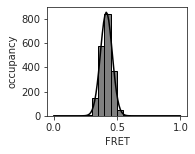

In [9]:
with sns.axes_style('ticks'):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 2), sharex=False, sharey=False, squeeze=False)
    plt.hist(experiment.FRETefficiencies,bins=20, range=(0,1), color='grey', edgecolor='black')
    plt.plot(x_fit, y_fit, color='k')
    ax[0,0].set_xlabel('FRET')
    ax[0,0].set_ylabel('occupancy')

Plot the decay times by fluorescence emission and internal conversion for donor electrons after donor excitation and acceptor electrons upon acceptor excitation

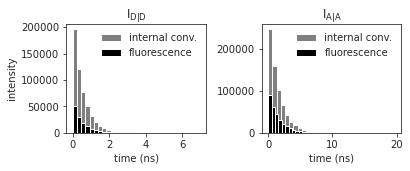

In [29]:
with sns.axes_style('ticks'):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 2), sharex=False, sharey=False, squeeze=False, gridspec_kw={'wspace':0.4})
    ax[0,0].hist(experiment.decaytimes_DD_DA['D_ic'], bins=30, color='grey')
    ax[0,0].hist(experiment.decaytimes_DD_DA['D_p'], bins=30, color='black')
    ax[0,1].hist(experiment.decaytimes_AA['A_ic'], bins=30, color='grey')
    ax[0,1].hist(experiment.decaytimes_AA['A_p'], bins=30, color='black')
    
    ax[0,0].legend(['internal conv.', 'fluorescence'], frameon=False)
    ax[0,1].legend(['internal conv.', 'fluorescence'], frameon=False)
    ax[0,0].set_title('$\mathregular{I_{D|D}}$')
    ax[0,1].set_title('$\mathregular{I_{A|A}}$')
    ax[0,0].set_ylabel('intensity')
    ax[0,0].set_xlabel('time (ns)')
    ax[0,1].set_xlabel('time (ns)')

Plot the plolarization resolved fluorescence decay of the donor and the acceptor

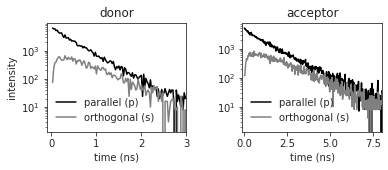

In [34]:
with sns.axes_style('ticks'):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 2), sharex=False, sharey=False, squeeze=False, gridspec_kw={'wspace':0.4})
    ax[0,0].semilogy(experiment.polIntensity['D_p'][:,0], experiment.polIntensity['D_p'][:,1], color='k')
    ax[0,0].semilogy(experiment.polIntensity['D_p'][:,0], experiment.polIntensity['D_p'][:,2], color='grey')
    ax[0,1].semilogy(experiment.polIntensity['A_p'][:,0], experiment.polIntensity['A_p'][:,1], color='k')
    ax[0,1].semilogy(experiment.polIntensity['A_p'][:,0], experiment.polIntensity['A_p'][:,2], color='grey')
    
    ax[0,0].legend(['parallel (p)', 'orthogonal (s)'], frameon=False)
    ax[0,1].legend(['parallel (p)', 'orthogonal (s)'], frameon=False)
    ax[0,0].set_title('donor')
    ax[0,1].set_title('acceptor')
    ax[0,0].set_ylabel('intensity')
    ax[0,0].set_xlabel('time (ns)')
    ax[0,1].set_xlabel('time (ns)')
    ax[0,0].set_xlim(-0.1,3)
    ax[0,1].set_xlim(-0.1,8)

Plot the anisotropy decay of the donor and acceptor fluorophore

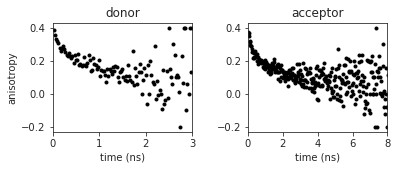

In [25]:
with sns.axes_style('ticks'):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 2), sharex=False, sharey=False, squeeze=False, gridspec_kw={'wspace':0.4})
    ax[0,0].plot(experiment.anisotropy['D_p'][:,0], experiment.anisotropy['D_p'][:,1], '.', color='k')
    ax[0,1].plot(experiment.anisotropy['A_p'][:,0], experiment.anisotropy['A_p'][:,1], '.', color='k')
    ax[0,0].set_ylabel('anisotropy')
    ax[0,0].set_xlabel('time (ns)')
    ax[0,1].set_xlabel('time (ns)')
    ax[0,0].set_title('donor')
    ax[0,1].set_title('acceptor')
    ax[0,0].set_xlim(0,3)
    ax[0,1].set_xlim(0,8)